# Как улучшить визуализацию графиков от Александра Синюкова

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

#### Пример отчета из рабочего письма.

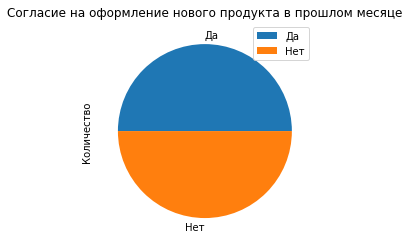

In [2]:
a = pd.DataFrame(data={'Количество': [1, 1]}, index=['Да', 'Нет'])
a.plot(y='Количество', kind = 'pie', title='Согласие на оформление нового продукта в прошлом месяце')
plt.show()

Хорошо это или плохо?

1. Сколько было клиентов в тесте? Вдруг два?
2. Какая конверсия была раньше?
3. 50% -- это итог или не дозрело?

### Зачем нужна визуализация?
1. Анализ данных
2. Регулярная отчетность, мониторинг
3. Презентации

In [3]:
n = 1000
city = np.random.choice(['Москва', 'Московская область', 'Санкт-Петербург', 'Ленинградская область', 'Другое'], n, p=[0.32, 0.2, 0.16, 0.03, 0.29])
use =  np.random.choice([0, 1], 1000, p=[0.9, 0.1])
salary = np.hstack([np.random.randint(1000, 10000, 400), np.random.randint(10000, 20000, 100),
                   np.random.randint(20000, 30000, 50), np.random.randint(30000, 40000, 80),
                   np.random.randint(40000, 50000, 70), np.random.randint(50000, 60000, 100),
                   np.random.randint(60000, 70000, 90), np.random.randint(70000, 80000, 100),
                   np.random.randint(700000, 750000, 10)])
np.random.shuffle(salary)

df = pd.concat([pd.Series(city), pd.Series(use), pd.Series(salary)], axis=1)
df.columns = ['city', 'use', 'salary']

### Круговая диаграмма 

**Общая задача: понять распределение по типам**

**Примеры конкретных задач,
которые можно решать с помощью круговых диаграмм:**
* Распределение клиентов по регионам
* Распределение пользователей приложения по марке телефона
* Структура доходов и расходов продукта
* Доля клиентов, пользующихся каждым продуктом
* Распределение людей на вебинаре по теме, на которой они отвалились

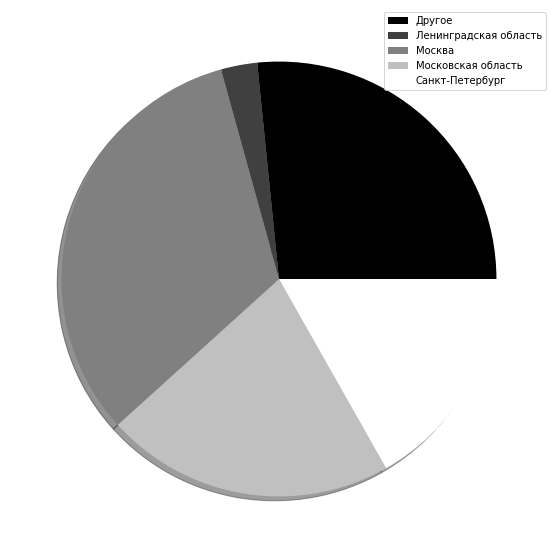

In [4]:
df.groupby('city')['city'].agg('count').plot(kind='pie', cmap='gray', labels=None, label='', shadow=True, legend=True, figsize=(10, 10))
plt.show()

Проблемы:
* Нет заголовка
* Цвета плохо различимы
* Не отсортировано
* Не указаны ни числа, ни доли

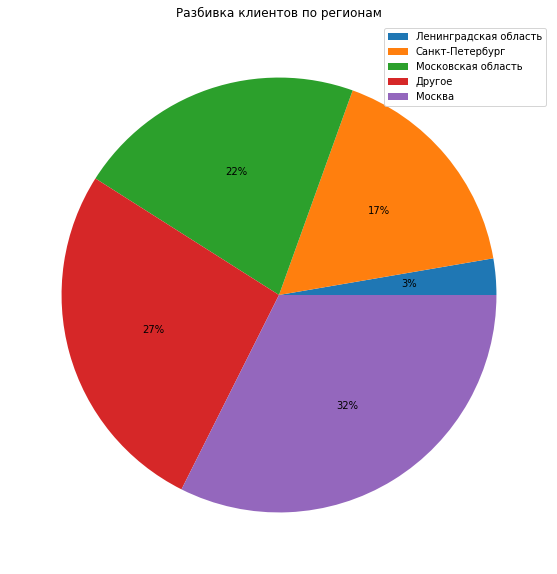

In [5]:
(df.groupby('city')['city'].agg('count').sort_values(ascending=True)
 .plot(kind='pie', labels=None, label='', autopct='%1.0f%%', 
       legend=True, figsize=(10, 10), title='Разбивка клиентов по регионам'))
plt.show()

### Столбчатая диаграмма

**Общая задача: сравнить определенный показатель в разных группах**

**Примеры конкретных задач,
которые можно решать с помощью линейчатых диаграмм**:

* Актуальность предложения в зависимости от региона
* Конверсия по каналам поступления заявки 
* Проникновение услуг в зависимости от типа продукта 
* Средний доход заявителей по региону
* Доля автовладельцев среди клиентов каждого региона

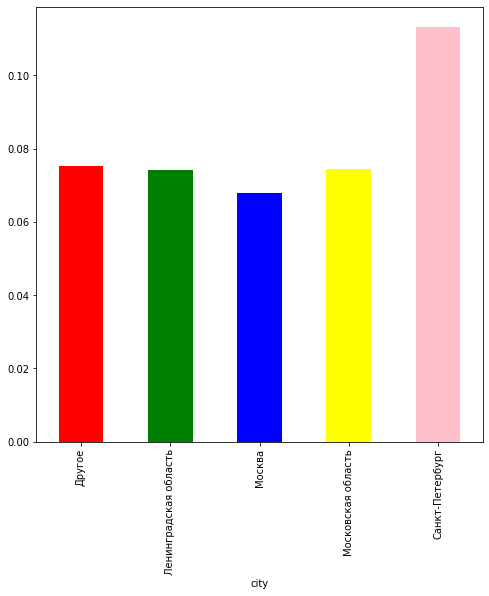

In [6]:
(df.groupby('city')['use'].agg('mean')
 .plot(kind='bar', color=['red', 'green', 'blue', 'yellow', 'pink'], figsize=(8, 8)))
plt.show()

Проблемы:

* Нет заголовка
* Выбор цветов отвлекает внимание
* Не отсортировано
* Неудобно сравнивать

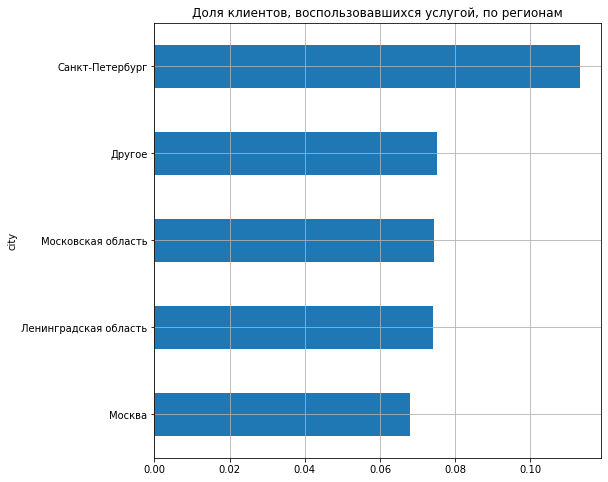

In [7]:
(df.groupby('city')['use'].agg('mean').sort_values()
 .plot(kind='barh', figsize=(8, 8), title='Доля клиентов, воспользовавшихся услугой, по регионам', grid=True))
plt.show()

### Гистограмма

**Общая задача: нарисовать распределение по некоторому числовому параметру**

**Примеры конкретных задач,
которые можно решать с помощью линейчатых диаграмм**:

* Распределение заявителей по доходу, возрасту
* Распределение клиентов по тратам за месяц
* Распределение клиентов по количеству продуктов в банке 
* Распределение по количеству входов в мобильное приложение за месяц

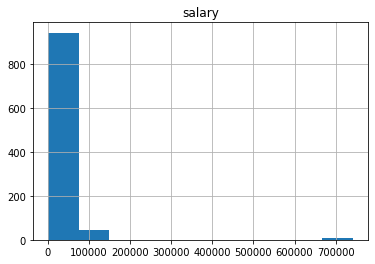

In [8]:
df.hist(column='salary')
plt.show()

Проблемы:

* Не ясна структура
* Большое число столбиков не информативны

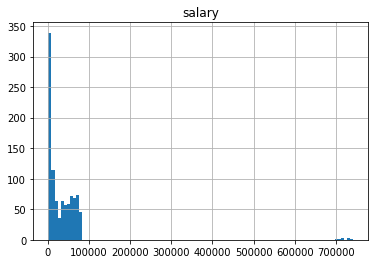

In [9]:
df.hist(column='salary', bins=100)
plt.show()

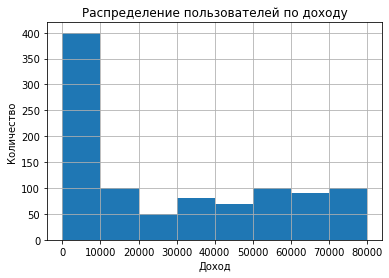

In [10]:
df.hist(column='salary', bins=8, range=(0, 80000))
plt.grid(True)
plt.title('Распределение пользователей по доходу')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()

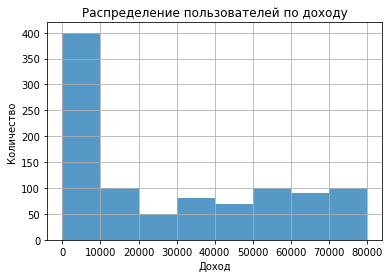

In [11]:
a = plt.hist(df['salary'], bins=8, alpha=0.75, range=(0, 80000))
plt.grid(True)
plt.title('Распределение пользователей по доходу')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()

### График

**Общая задача: посмотреть динамику показателей**

**Примеры конкретных задач,
которые можно решать с помощью графиков**

* Конверсии в каналах
* Число клиентских обращений по времени
* Доля клиентов, пользующихся определенным продуктом
* Доля клиентов, использующих бонусную программу 
* График количества людей на вебинаре по времени

In [12]:
min_month = pd.to_datetime('2018-10-01', format='%Y-%m-%d', errors='ignore')
max_month = pd.to_datetime('2020-10-01', format='%Y-%m-%d', errors='ignore')

dates = pd.date_range(min_month, max_month, freq='MS')
moscow = np.random.uniform(0.49, 0.51, len(dates))
krasnodar = np.random.uniform(0.48, 0.52, len(dates))


df_new = pd.concat([pd.Series(dates), pd.Series(moscow), pd.Series(krasnodar)], axis=1)
df_new.columns = ['dates', 'Moscow', 'Krasnodar']

df_new = df_new.set_index('dates')

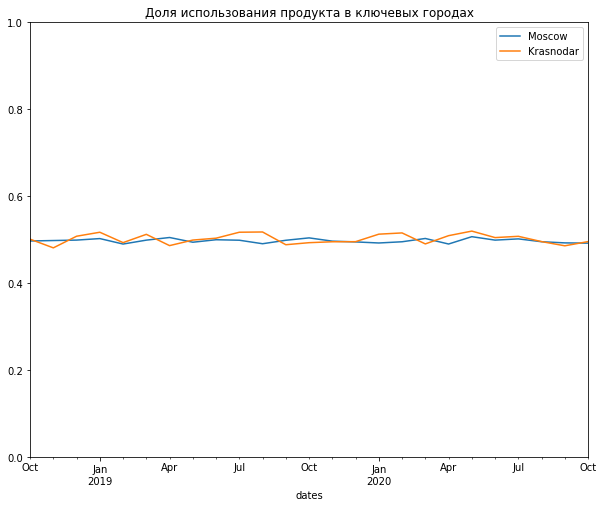

In [13]:
df_new.plot(title='Доля использования продукта в ключевых городах', figsize=(10, 8), scaley=False)
plt.show()

Проблемы:

* Не видно различий между линиями из-за масштаба
* Не видно временных эффектов

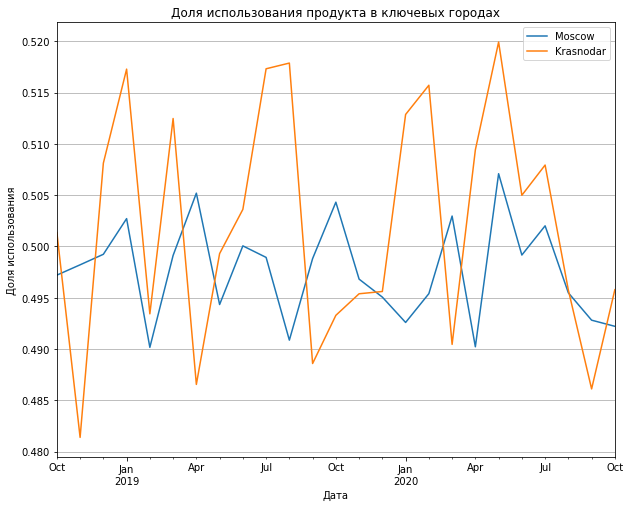

In [14]:
ax = df_new.plot(title='Доля использования продукта в ключевых городах', figsize=(10, 8), xlabel='Дата', ylabel='Доля использования')
ax.yaxis.grid(True)

plt.show()

### Точечная диаграмма

**Общая задача: найти зависимость между параметрами**

**Примеры конкретных задач,
которые можно решать с помощью точечных диаграмм**:

* Связь между числом жителей города и их доходом 
* Связь между ростом и весом
* Связь между возрастом и уровнем дохода

In [15]:
n = 200
age = np.random.randint(18, 71, n)
salary_ = np.log((29 - abs(age - 45))) * 20000 + np.random.randint(-15000, 15000, n) + 10000
salary_[35] += 250000
salary_[70] += 300000
salary_[105] += 80000

In [16]:
df_ages = pd.concat([pd.Series(age), pd.Series(salary_)], axis=1)
df_ages.columns = ['age', 'salary']

In [17]:
df_ages.head()

,age,salary
0,68,53097.189385
1,60,65985.146592
2,38,74193.849067
3,54,57739.645471
4,27,43480.905456


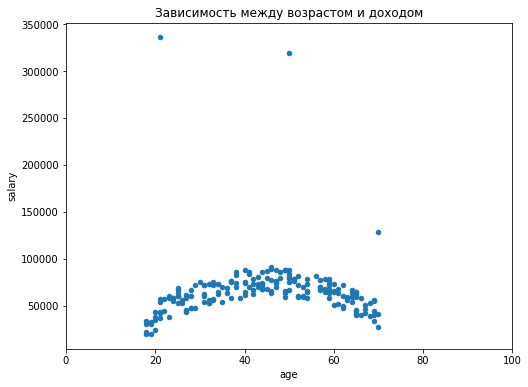

In [18]:
df_ages.plot(x='age', y='salary', kind='scatter', title='Зависимость между возрастом и доходом', 
             xlim=(0, 100), figsize=(8, 6))
plt.show()

Проблемы:

* Не видно тренда 
* Мешают выбросы
* Неудачный масштаб

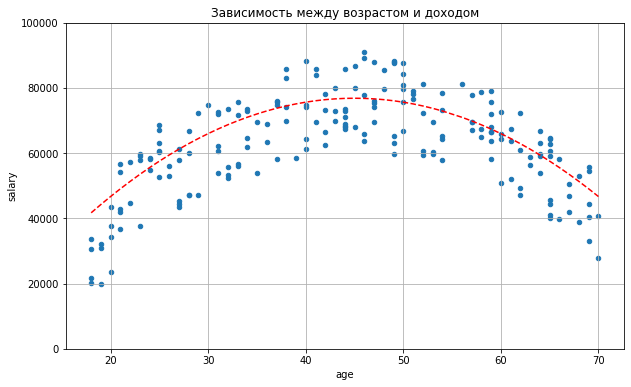

In [19]:
sorted_df_ages = df_ages.sort_values('age')
sorted_df_ages.plot(x='age', y='salary', kind='scatter', title='Зависимость между возрастом и доходом', 
                    ylim=(0, 100000), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_df_ages['age'], sorted_df_ages['salary'], 2)
p = np.poly1d(z)
plt.plot(sorted_df_ages['age'], p(sorted_df_ages['age']),"r--")
plt.show()

### Безболезненные улучшения графиков

Улучшение четкости изображения

In [20]:
%config InlineBackend.figure_format = 'retina'

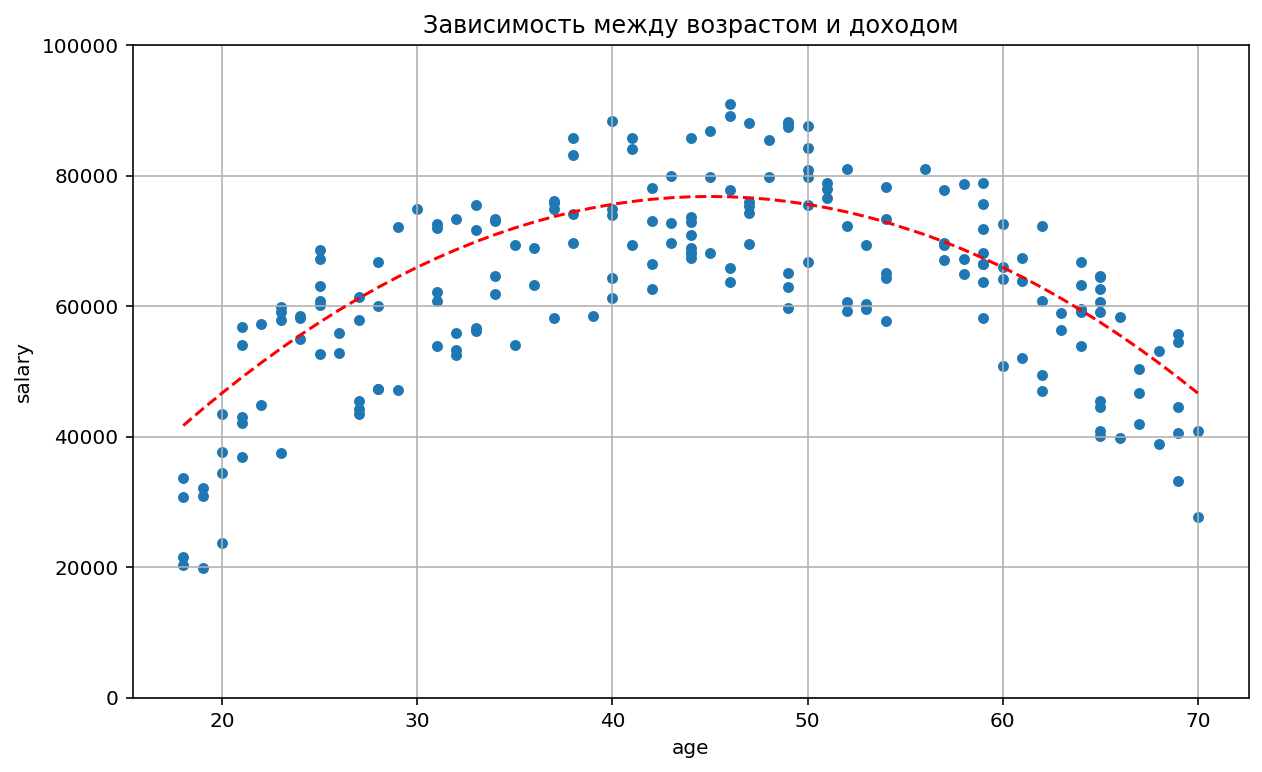

In [21]:
sorted_df_ages = df_ages.sort_values('age')
sorted_df_ages.plot(x='age', y='salary', kind='scatter', title='Зависимость между возрастом и доходом', ylim=(0, 100000), grid=True, figsize=(10, 6))

z = np.polyfit(sorted_df_ages['age'], sorted_df_ages['salary'], 2)
p = np.poly1d(z)
plt.plot(sorted_df_ages['age'], p(sorted_df_ages['age']),"r--")
plt.show()

Использование цветовой схемы

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

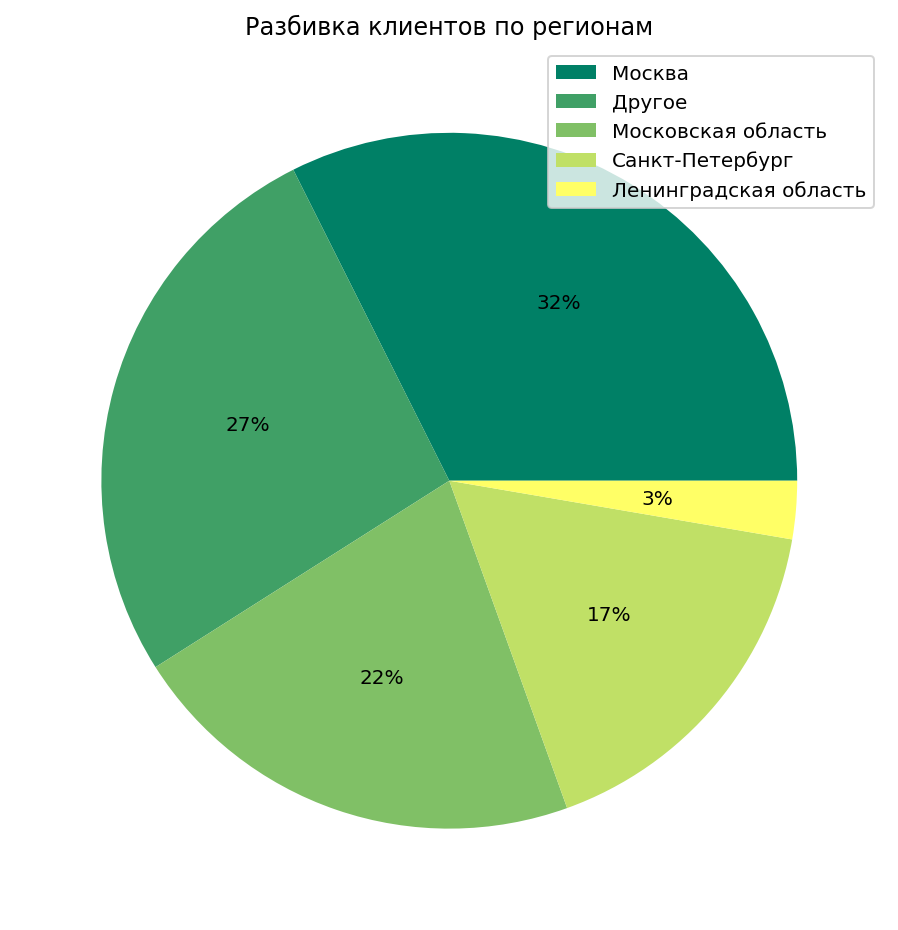

In [22]:
(df.groupby('city')['city'].agg('count').sort_values(ascending=False)
 .plot(kind='pie', labels=None, label='', autopct='%1.0f%%', legend=True, figsize=(8, 8), 
       title='Разбивка клиентов по регионам', cmap='summer'))
plt.show()

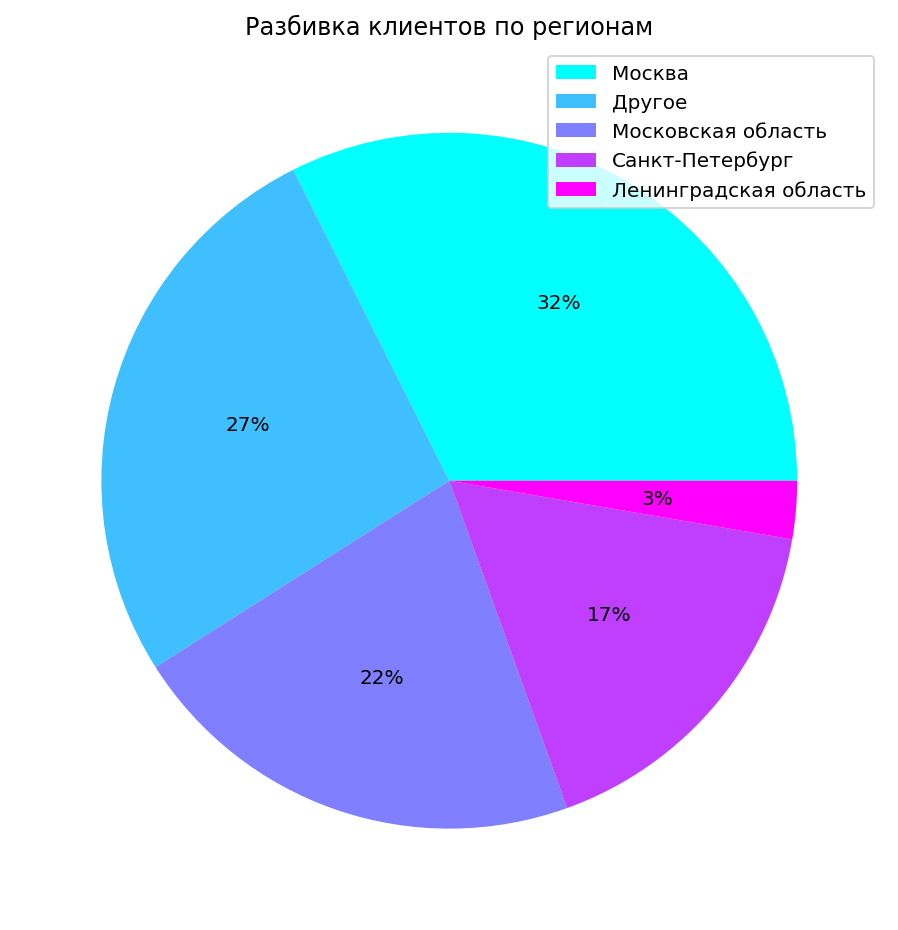

In [23]:
(df.groupby('city')['city'].agg('count').sort_values(ascending=False)
 .plot(kind='pie', labels=None, label='', autopct='%1.0f%%', legend=True, figsize=(8, 8), 
       title='Разбивка клиентов по регионам', cmap='cool'))
plt.show()

Использование стилей

https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html

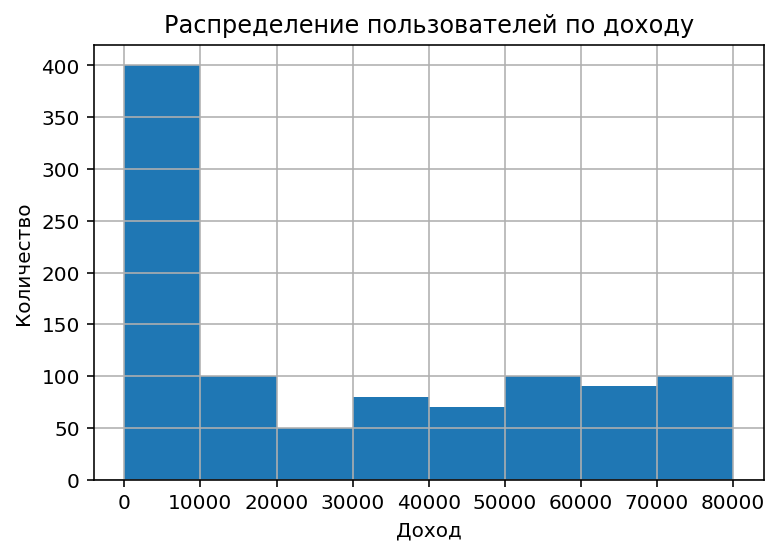

In [24]:
df.hist(column='salary', bins=8, range=(0, 80000))
plt.grid(True)
plt.title('Распределение пользователей по доходу')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()

In [25]:
matplotlib.style.use('seaborn-dark') 

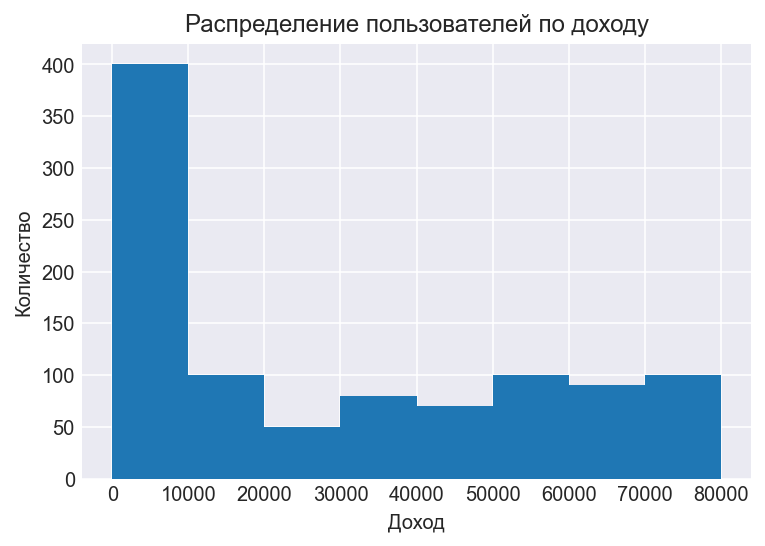

In [26]:
df.hist(column='salary', bins=8, range=(0, 80000))
plt.title('Распределение пользователей по доходу')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()

In [27]:
matplotlib.style.use('seaborn-pastel')

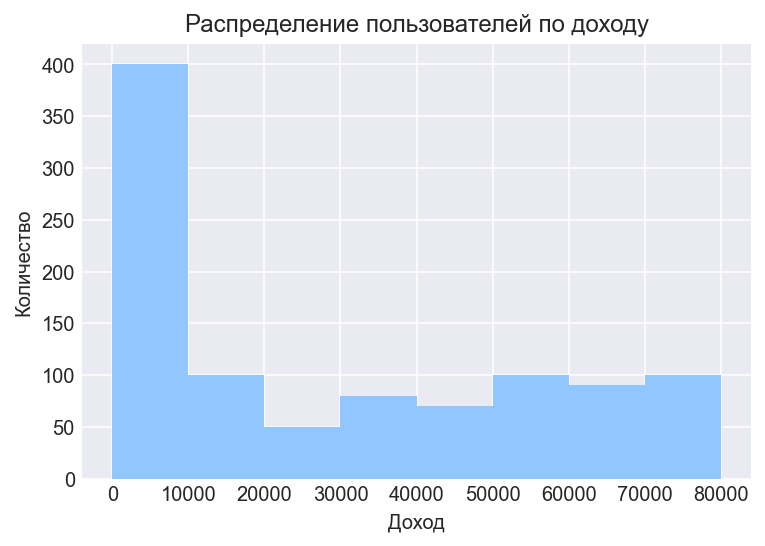

In [28]:
df.hist(column='salary', bins=8, range=(0, 80000))
plt.title('Распределение пользователей по доходу')
plt.xlabel('Доход')
plt.ylabel('Количество')
plt.show()

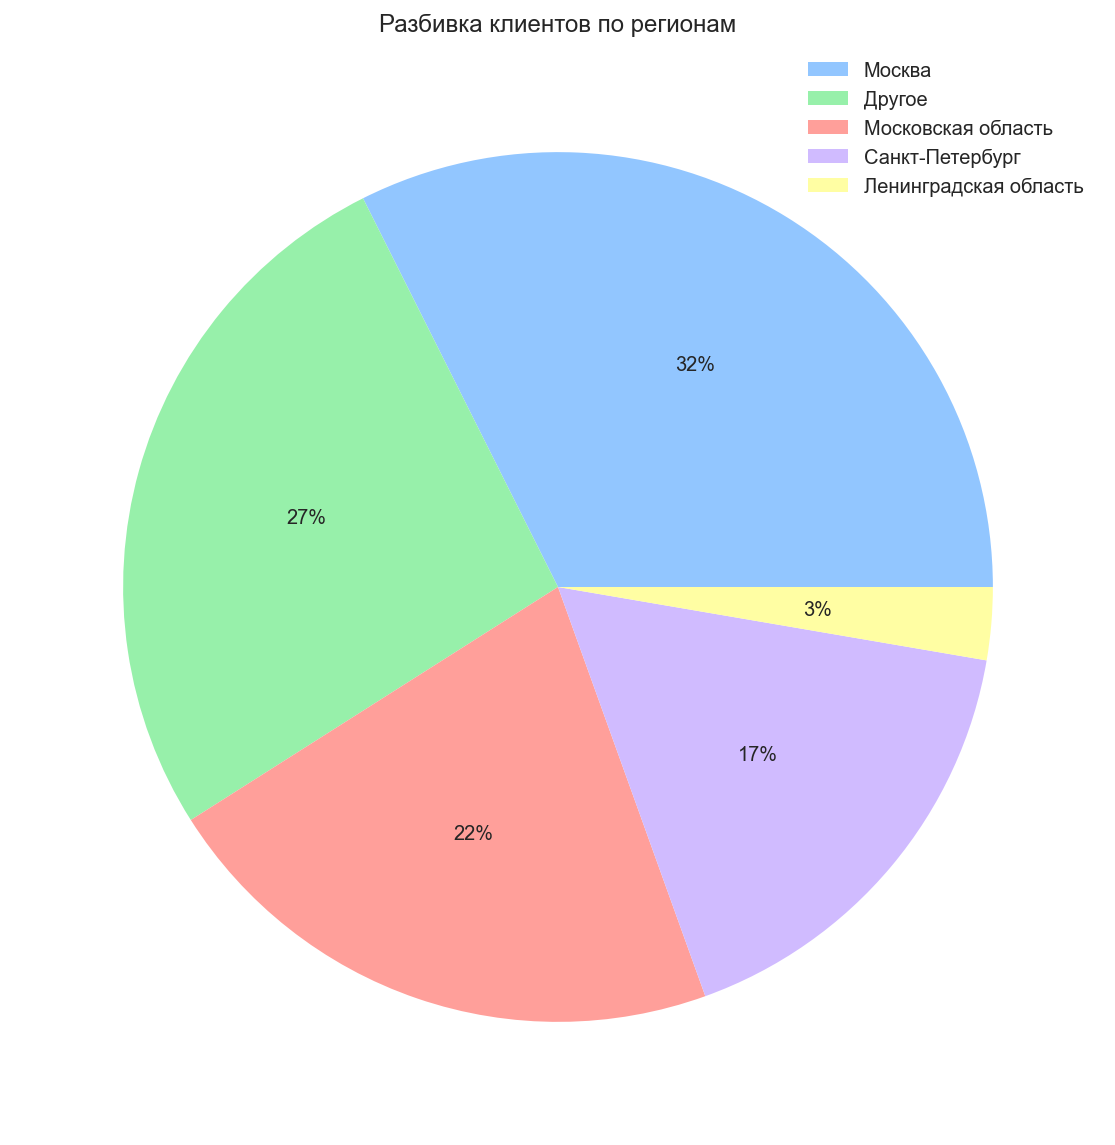

In [29]:
(df.groupby('city')['city'].agg('count').sort_values(ascending=False)
 .plot(kind='pie', labels=None, label='', autopct='%1.0f%%', legend=True, figsize=(10, 10), 
       title='Разбивка клиентов по регионам'))
plt.show()

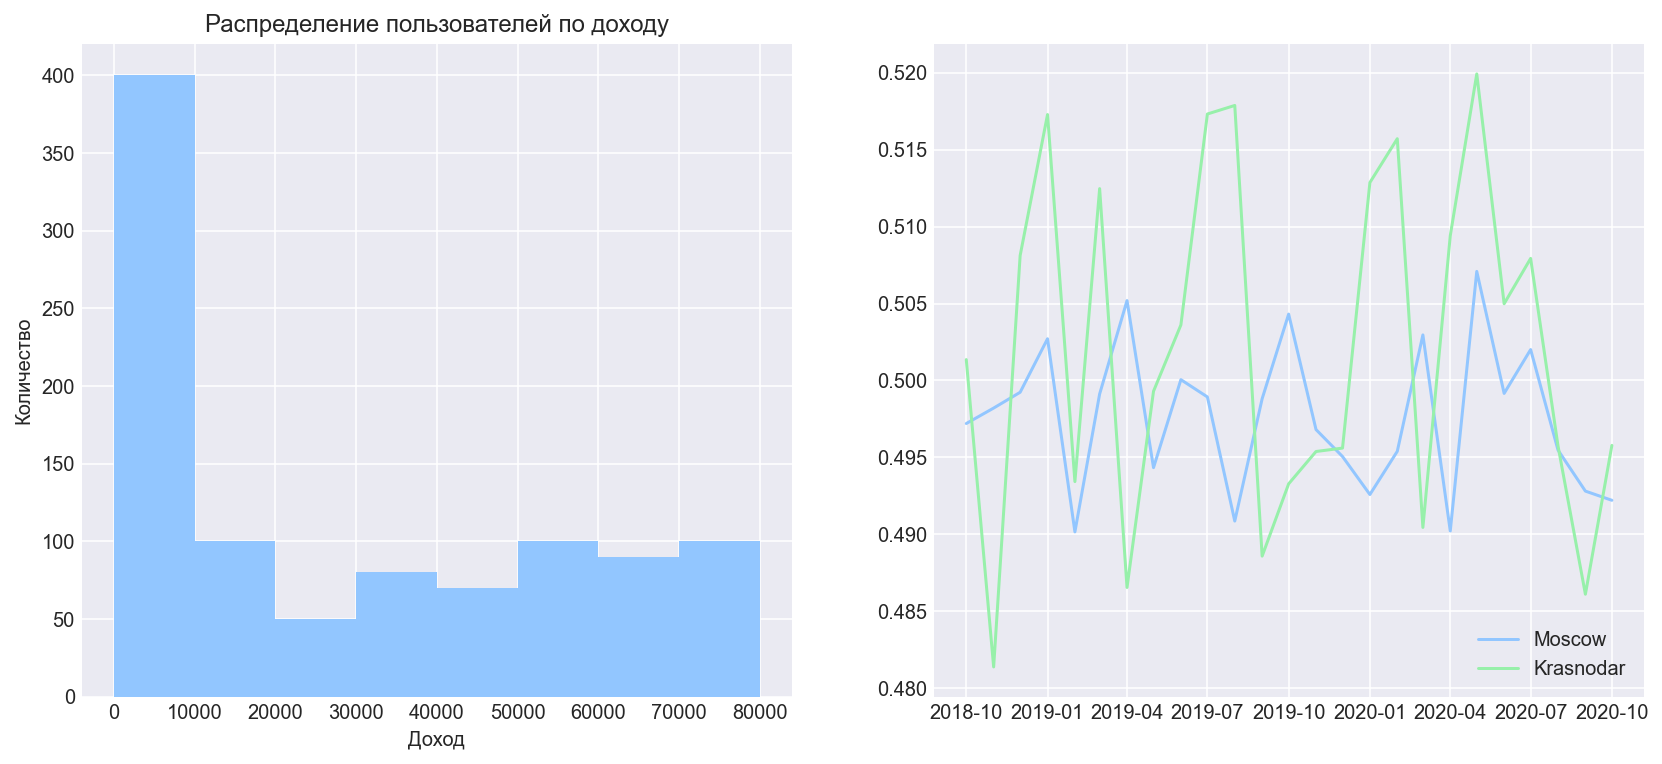

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.hist(df['salary'], bins=8, range=(0, 80000))
ax1.grid(True)
ax1.set_title('Распределение пользователей по доходу')
ax1.set_xlabel('Доход')
ax1.set_ylabel('Количество')

ax2.plot(df_new.index, df_new['Moscow'], label='Moscow')
ax2.plot(df_new.index, df_new['Krasnodar'], label='Krasnodar')
ax2.grid(True)
ax2.legend()
plt.show()

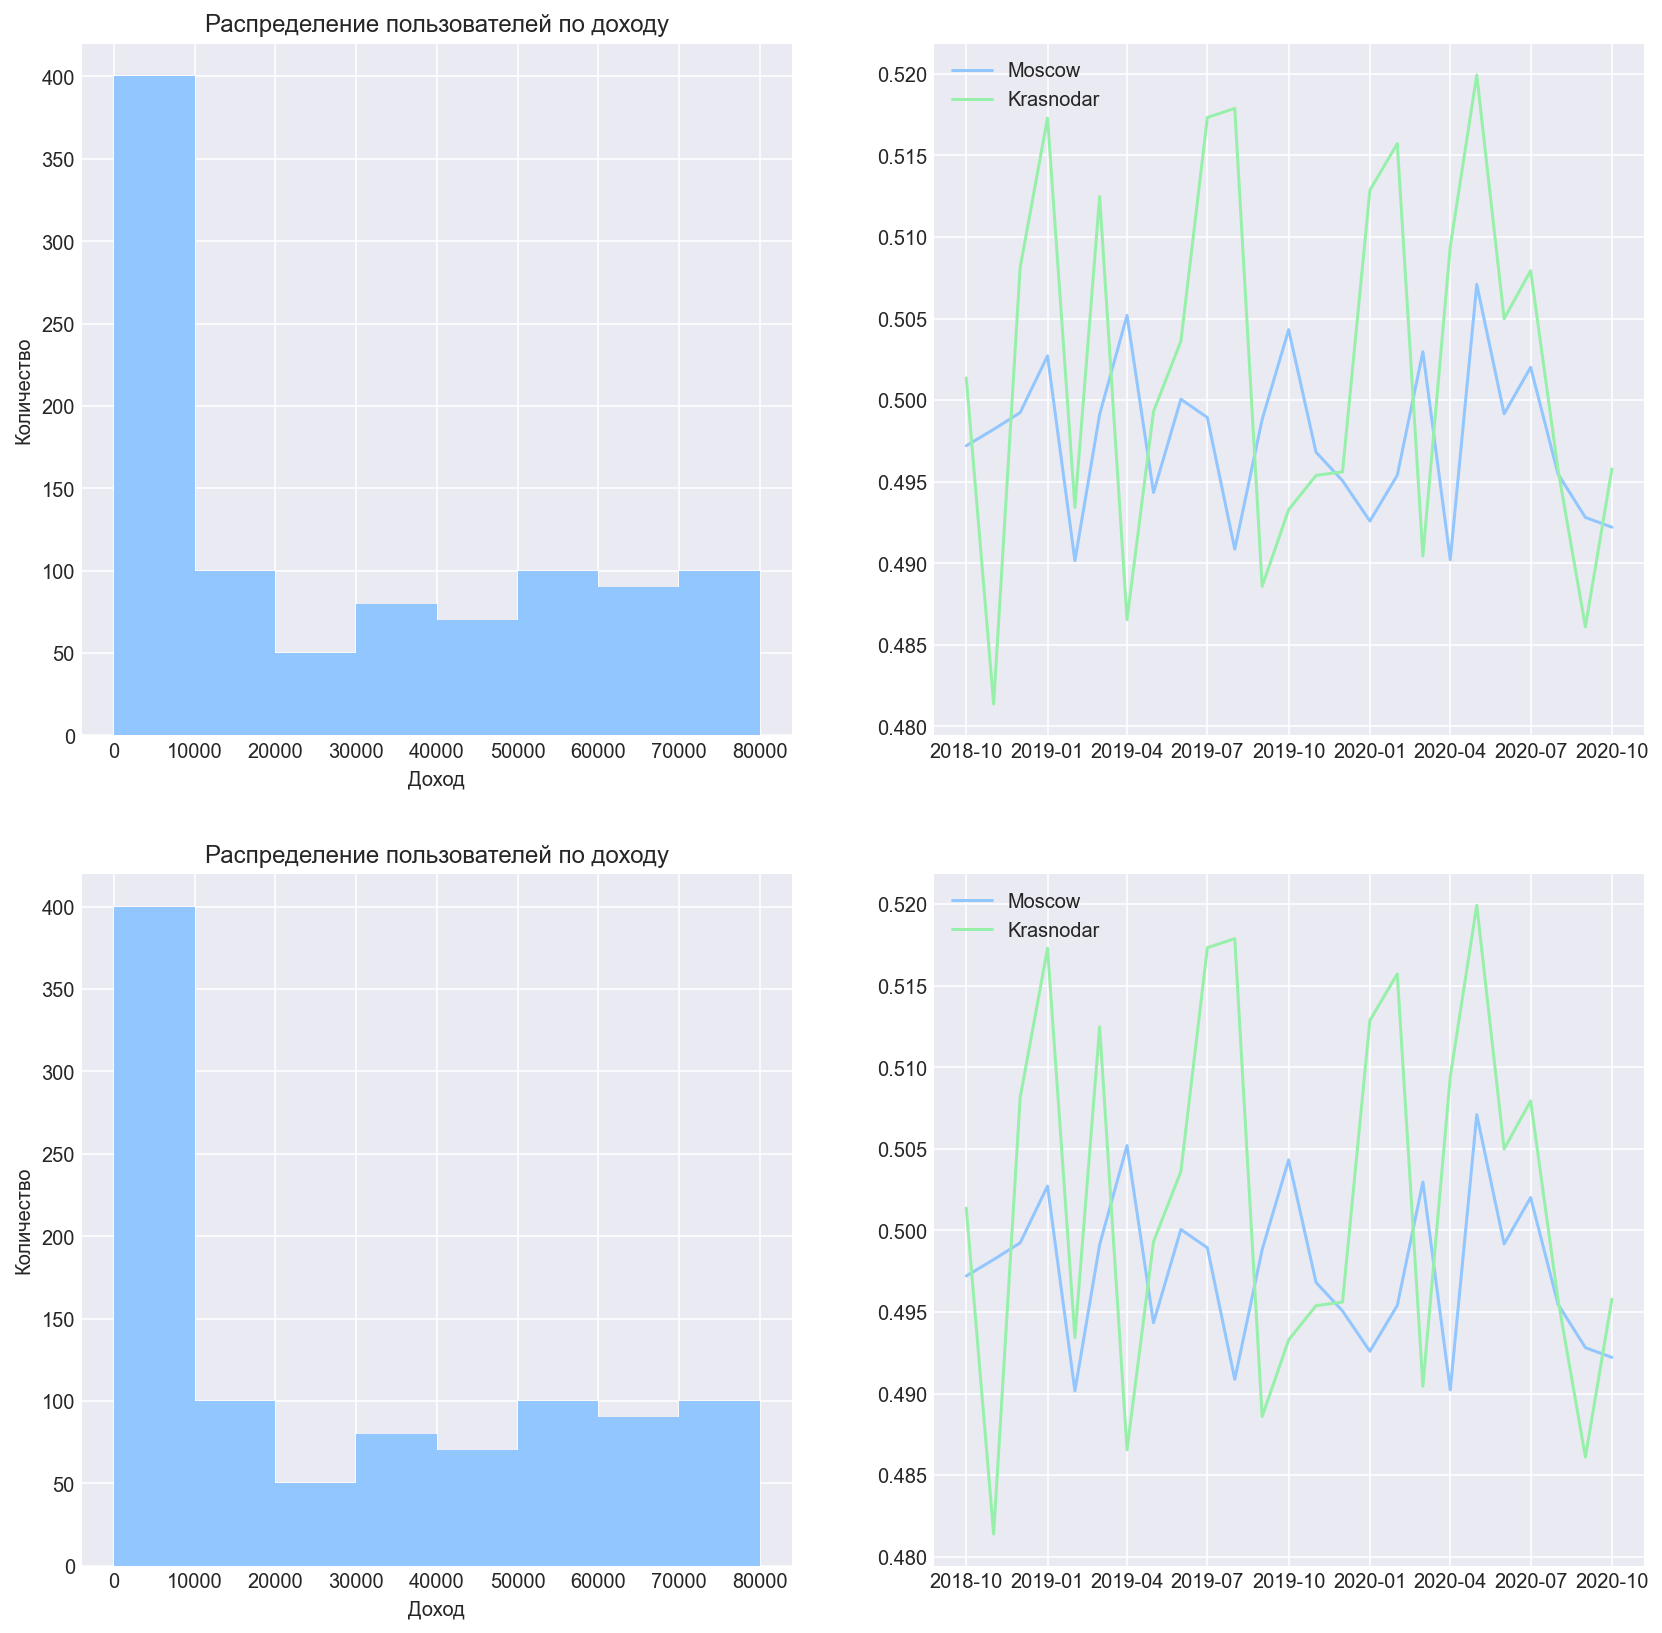

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))

ax[0][0].hist(df['salary'], bins=8, range=(0, 80000))
ax[0][0].grid(True)
ax[0][0].set_title('Распределение пользователей по доходу')
ax[0][0].set_xlabel('Доход')
ax[0][0].set_ylabel('Количество')

ax[0][1].plot(df_new.index, df_new['Moscow'], label='Moscow')
ax[0][1].plot(df_new.index, df_new['Krasnodar'], label='Krasnodar')
ax[0][1].grid(True)
ax[0][1].legend()

ax[1][0].hist(df['salary'], bins=8, range=(0, 80000))
ax[1][0].grid(True)
ax[1][0].set_title('Распределение пользователей по доходу')
ax[1][0].set_xlabel('Доход')
ax[1][0].set_ylabel('Количество')

ax[1][1].plot(df_new.index, df_new['Moscow'], label='Moscow')
ax[1][1].plot(df_new.index, df_new['Krasnodar'], label='Krasnodar')
ax[1][1].grid(True)
ax[1][1].legend()

plt.show()

ToDo:
1. Визуализация (руководство)
2. Код для красивостей в цикле
3. 'r--' ссылка